---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("All Done")

All Done


### Include an exploratory visualization of the dataset

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = (len(X_train))

# TODO: Number of validation examples
n_validation = (len(X_valid))

# TODO: Number of testing examples.
n_test = (len(X_test))

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


33


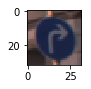

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


index = random.randint(0, len(X_train))

#index = 17999
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])
#print (X_train[index])

In [4]:
# affine Image Augmentation Fucntion Block
#Code thanks to vxy10 via ImageAugmentation - Github: https://github.com/vxy10/ImageAugmentation

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cv2

import numpy as np
%matplotlib inline
import matplotlib.image as mpimg

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    #print(random_bright)
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range,brightness=0):
    '''
    This function transforms images to generate new images.
    The function takes in following arguments,
    1- Image
    2- ang_range: Range of angles for rotation
    3- shear_range: Range of values to apply affine transform to
    4- trans_range: Range of values to apply translations over.

    A Random uniform distribution is used to generate different parameters for transformation

    '''
    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    # Brightness


    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))

    if brightness == 1:
      img = augment_brightness_camera_images(img)

    return img

In [6]:
# Normalize number of images from each catagory using affined images

import math


#create a histrogram of training images by category
histolist = np.zeros(43) 
for i in range(len(y_train)):
    histolist[y_train[i]]+=1

print(histolist)
    

[  180.  1980.  2010.  1260.  1770.  1650.   360.  1290.  1260.  1320.
  1800.  1170.  1890.  1920.   690.   540.   360.   990.  1080.   180.
   300.   270.   330.   450.   240.  1350.   540.   210.   480.   240.
   390.   690.   210.   599.   360.  1080.   330.   180.  1860.   270.
   300.   210.   210.]


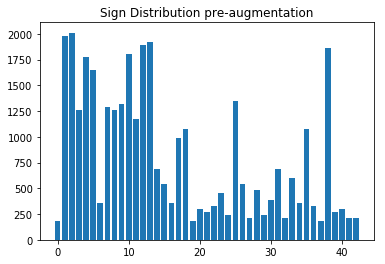

In [26]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)
#a = np.hstack((rng.normal(size=1000),
               #rng.normal(loc=5, scale=2, size=1000)))

plt.bar(range(43),histolist)
plt.title("Sign Distribution pre-augmentation")
plt.show()

In [22]:
#add the affined images to our training data
new_size = math.ceil(n_train*5/43)
eX_train = []
ey_train = []
for i in range(len(X_train)):
    occurance_rate = histolist[y_train[i]]
    eX_train.append(X_train[i])
    ey_train.append(y_train[i])
    num_jitters =(math.ceil((new_size - occurance_rate)/occurance_rate))
    for _ in range(num_jitters):
        jitter = transform_image(X_train[i],20,10,5,brightness=1)
        eX_train.append(jitter)
        ey_train.append(y_train[i])
eX_train = np.array(eX_train)
ey_train = np.array(ey_train)


In [23]:
histolist2 = np.zeros(43) 
for i in range(len(ey_train)):
    histolist2[ey_train[i]]+=1

print(histolist2)

[ 4140.  5940.  6030.  5040.  5310.  4950.  4320.  5160.  5040.  5280.
  5400.  4680.  5670.  5760.  4140.  4320.  4320.  4950.  4320.  4140.
  4200.  4050.  4290.  4050.  4080.  4050.  4320.  4200.  4320.  4080.
  4290.  4140.  4200.  4193.  4320.  4320.  4290.  4140.  5580.  4050.
  4200.  4200.  4200.]


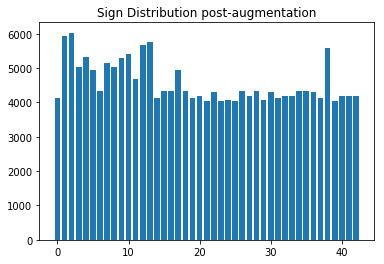

In [27]:
import matplotlib.pyplot as plt
plt.bar(range(43),histolist2)
plt.title("Sign Distribution post-augmentation")
plt.show()

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plots = [[[ 27.29934311,  23.50445175,  18.98613548,  18.20011711,
         17.57636642],
       [ 59.04275894,  40.32078934,  40.23249817,  38.8664856 ,
         36.70235825],
       [ 39.48780441,  22.64865112,  19.65498734,  19.62361145,  19.1497345 ],
       [ 28.42455101,  24.86112213,  24.17674828,  21.89281464,
         20.73781013],
       [ 42.79763794,  30.48266983,  30.37314796,  29.46491814,
         28.02173805]], [[ 4, 21, 31, 24, 18],
       [18, 24, 21, 26, 29],
       [12, 40, 11, 38,  2],
       [40,  1,  3,  8,  0],
       [36, 14, 17, 38, 12]]]

In [32]:
print(plots[0][0])
print(plots[1][0])

[27.29934311, 23.50445175, 18.98613548, 18.20011711, 17.57636642]
[4, 21, 31, 24, 18]


In [37]:
def lookup(x):
    if x== 0 : return ("Speed limit (20km/h)")
    if x== 1 : return ("Speed limit (30km/h)")
    if x== 2 : return ("Speed limit (50km/h)")
    if x== 3 : return ("Speed limit (60km/h)")
    if x== 4 : return ("Speed limit (70km/h)")
    if x== 5 : return ("Speed limit (80km/h)")
    if x== 6 : return ("End of speed limit (80km/h)")
    if x== 7 : return ("Speed limit (100km/h)")
    if x== 8 : return ("Speed limit (120km/h)")
    if x== 9 : return ("No passing")
    if x== 10 : return ("No passing for vehicles over 3.5 metric tons")
    if x== 11 : return ("Right-of-way at the next intersection")
    if x== 12 : return ("Priority road")
    if x== 13 : return ("Yield")
    if x== 14 : return ("Stop")
    if x== 15 : return ("No vehicles")
    if x== 16 : return ("Vehicles over 3.5 metric tons prohibited")
    if x== 17 : return ("No entry")
    if x== 18 : return ("General caution")
    if x== 19 : return ("Dangerous curve to the left")
    if x== 20 : return ("Dangerous curve to the right")
    if x== 21 : return ("Double curve")
    if x== 22 : return ("Bumpy road")
    if x== 23 : return ("Slippery road")
    if x== 24 : return ("Road narrows on the right")
    if x== 25 : return ("Road work")
    if x== 26 : return ("Traffic signals")
    if x== 27  : return ("Pedestrians")
    if x== 28 : return ("Children crossing")
    if x== 29 : return ("Bicycles crossing")
    if x== 30 : return ("Beware of ice/snow")
    if x== 31 : return ("Wild animals crossing")
    if x== 32 : return ("End of all speed and passing limits")
    if x== 33 : return ("Turn right ahead")
    if x== 34 : return ("Turn left ahead")
    if x== 35 : return ("Ahead only")
    if x== 36 : return ("Go straight or right")
    if x== 37 : return ("Go straight or left")
    if x== 38 : return (",Keep right")
    if x== 39 : return ("Keep left")
    if x== 40 : return ("Roundabout mandatory")
    if x== 41 : return ("End of no passing")
    if x== 42 : return ("End of no passing by vehicles over 3.5 metric tons")



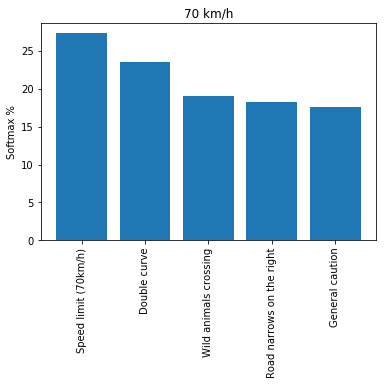

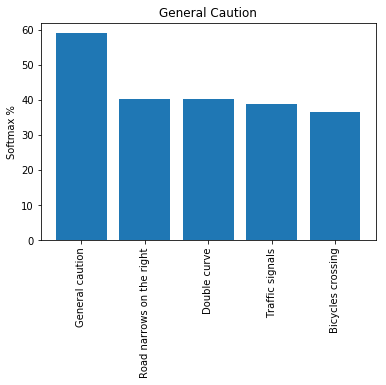

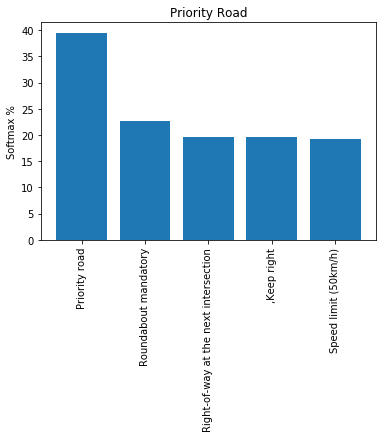

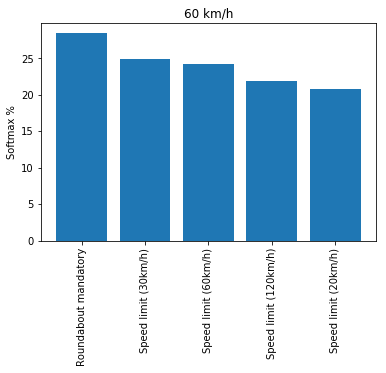

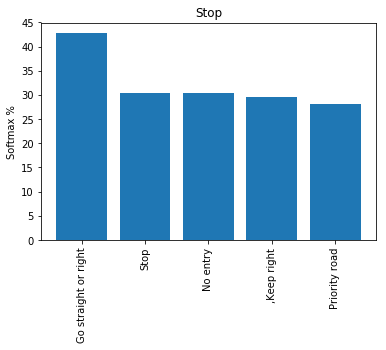

In [50]:
title_list = ["70 km/h", "General Caution", "Priority Road", "60 km/h", "Stop"]
for i in range(len(plots[0])):
    fig, a = plt.subplots()
    a.bar([2,3,4,5,6], plots[0][i])
    a.set_ylabel('Softmax %')
    a.set_xticklabels(('null', lookup(plots[1][i][0]), lookup(plots[1][i][1]), lookup(plots[1][i][2]), lookup(plots[1][i][3]), lookup(plots[1][i][4])), rotation=90)
    a.set_title(title_list[i])
    plt.show()